# Imports

In [53]:
# skimage imports
from skimage import data, color, filters, morphology, graph, measure, exposure
from skimage.filters import threshold_otsu, threshold_local, try_all_threshold, sobel, gaussian
from skimage.transform import rotate, rescale, resize
from skimage.feature import canny
# scipy for image
from scipy import ndimage as ndi
# import for file interaction
import os
import io
# visualization tools
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# imports for reading from zip files
import zipfile
from PIL import Image
# array and data frame imports
import numpy as np
import pandas as pd
#pip install xlrd

We'll start by identifying and reading the zip files in the PATH location where the images and xls label files are stored.

In [126]:
# folder path
dir_path = r'C:\SPRINGBOARD\retinopathy-detection'
# list file and directories
file_names = os.listdir(dir_path+'\data')
display(file_names)

['Base11.zip',
 'Base12.zip',
 'Base13.zip',
 'Base14.zip',
 'Base21.zip',
 'Base22.zip',
 'Base23.zip',
 'Base24.zip',
 'Base31.zip',
 'Base32.zip',
 'Base33.zip',
 'Base34.zip']

In [127]:
def read_zip(zip_fn, extract_fn=None):
    '''
    Function for reading excel label files from zip files
    '''
    zf = zipfile.ZipFile(zip_fn)
    if extract_fn:
        return zf.read(extract_fn)
    else:
        return {name:zf.read(name) for name in zf.namelist()}

In [143]:
xls_count = 1
df_total = pd.DataFrame()

for file in file_names:
    # reading the zip files
    if '.zip' in file:
        # reading internal files
        zip_file = zipfile.ZipFile('{}\data\{}'.format(dir_path, file)) 
        for int_file in zip_file.namelist():
            # reading xls files for labels
            if '.xls' in int_file:
                df = pd.read_excel(io.BytesIO(read_zip(r'{}\data\{}'.format(dir_path, file), int_file))) # loading excel label files
                df_total = df_total.append(df, ignore_index=True) # appending all xls files
                df_total.drop(columns='Ophthalmologic department', inplace=True)
                print('Excel File {} ready!'.format(xls_count))
                xls_count += 1
df_total.to_csv(r'{}\data_processed\labels.csv'.format(dir_path), index=False)

Excel File 1 ready!
Excel File 2 ready!
Excel File 3 ready!
Excel File 4 ready!
Excel File 5 ready!
Excel File 6 ready!
Excel File 7 ready!
Excel File 8 ready!
Excel File 9 ready!
Excel File 10 ready!
Excel File 11 ready!
Excel File 12 ready!


In [144]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Image name              1200 non-null   object
 1   Retinopathy grade       1200 non-null   int64 
 2   Risk of macular edema   1200 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.2+ KB


In [145]:
df_total

Image name  Retinopathy grade  Risk of macular edema 
0     20051019_38557_0100_PP.tif                  3                       1
1     20051020_43808_0100_PP.tif                  0                       0
2     20051020_43832_0100_PP.tif                  1                       0
3     20051020_43882_0100_PP.tif                  2                       0
4     20051020_43906_0100_PP.tif                  3                       2
...                          ...                ...                     ...
1195  20051212_40940_0400_PP.tif                  3                       1
1196  20051212_41009_0400_PP.tif                  3                       0
1197  20051212_41144_0400_PP.tif                  3                       0
1198  20051212_41169_0400_PP.tif                  3                       0
1199  20051212_41432_0400_PP.tif                  3                       0

[1200 rows x 3 columns]

Reading tif images from zip files

In [ ]:
file_names = ['Base34.zip']
img_count = 1

for file in file_names:
    # reading the zip files
    if '.zip' in file:
        # reading internal files
        zip_file = zipfile.ZipFile('{}\data\{}'.format(dir_path, file)) 
        for int_file in zip_file.namelist():
            # reading xls files for labels
            if '.xls' in int_file:
                ### Loading it to a dataframe and appending all xls files
                print('Excel File {} ready!'.format(xls_count))
                xls_count += 1
            # reading tif files
            if '.tif' in int_file:
                ifile = zip_file.open(int_file)
                img_nparray = np.asarray(Image.open(ifile)) # converting them to np.arrays
                ### Processing Function
                ### Saving image to folder as processed
                print('Image {} ready! Shape: {}'.format(img_count, img_nparray.shape))
                img_count += 1

## (1) First Approach for Data Intake

Using imzip to read from zip file by file name, then converting image to a numpy array, then reshaping the image

In [3]:
zip = zipfile.ZipFile('Base12.zip')
zip.namelist()

['20051214_52492_0100_PP.tif',
 '20051214_52611_0100_PP.tif',
 '20051214_52695_0100_PP.tif',
 '20051214_52707_0100_PP.tif',
 '20051214_53168_0100_PP.tif',
 '20051214_56169_0100_PP.tif',
 '20051214_56242_0100_PP.tif',
 '20051214_56269_0100_PP.tif',
 '20051214_56392_0100_PP.tif',
 '20051214_56438_0100_PP.tif',
 '20051214_56534_0100_PP.tif',
 '20051214_56565_0100_PP.tif',
 '20051214_56636_0100_PP.tif',
 '20051214_56688_0100_PP.tif',
 '20051214_56778_0100_PP.tif',
 '20051214_56821_0100_PP.tif',
 '20051214_56944_0100_PP.tif',
 '20051214_56971_0100_PP.tif',
 '20051214_57125_0100_PP.tif',
 '20051214_57154_0100_PP.tif',
 '20051214_57230_0100_PP.tif',
 '20051021_51625_0100_PP.tif',
 '20051021_51748_0100_PP.tif',
 '20051021_51804_0100_PP.tif',
 '20051021_51936_0100_PP.tif',
 '20051021_51994_0100_PP.tif',
 '20051021_52075_0100_PP.tif',
 '20051021_52127_0100_PP.tif',
 '20051021_57798_0100_PP.tif',
 '20051021_57862_0100_PP.tif',
 '20051021_57975_0100_PP.tif',
 '20051021_58035_0100_PP.tif',
 '200510

In [4]:
def deflatten(names):
    names.sort(key=lambda name:len(name.split('/')))
    deflattened = []
    while len(names) > 0:
        name = names[0]
        if name[-1] == '/':
            subnames = [subname[len(name):] for subname in names if subname.startswith(name) and subname != name]
            for subname in subnames:
                names.remove(name+subname)
            deflattened.append((name, deflatten(subnames)))
        else:
            deflattened.append(name)
        names.remove(name)
    return deflattened

In [5]:
list_img = deflatten(zip.namelist())

In [6]:
list_img[0]

'20051214_52492_0100_PP.tif'

In [7]:
imgzip = zipfile.ZipFile('Base12.zip')
ifile = imgzip.open(list_img[0])
img = Image.open(ifile)

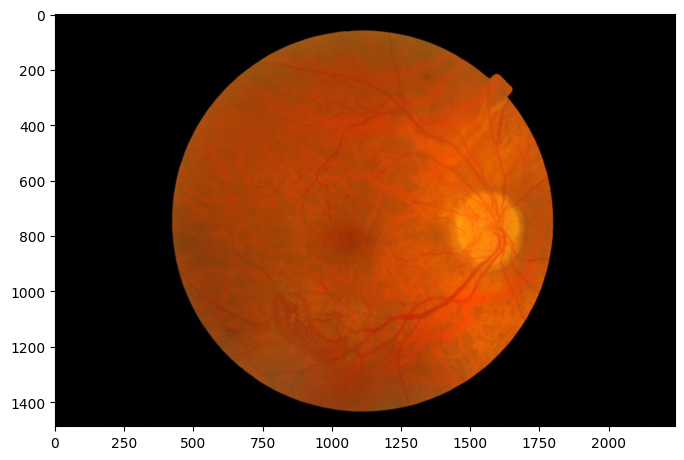

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray');

In [9]:
img_narray = np.asarray(img)

In [ ]:
img_narray.shape #Apparently the image is a RGB-3 colored (H, W, D)

In [ ]:
type(img_narray)

In [ ]:
# Dimensions: [m, n, 3]
new_img = img_narray.transpose()
# Dimensions: [3, n, m]
new_img = img_narray.reshape(img_narray.shape[0], (img_narray.shape[1]*img_narray.shape[2]))

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(new_img, cmap='gray');

In [ ]:
new_img.shape

# (2) Second Approach for Data Intake

Using plt reading and numpy, skimage for operations

In [10]:
def show_image(image, title="Image", cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()
    print(type(image), image.shape)

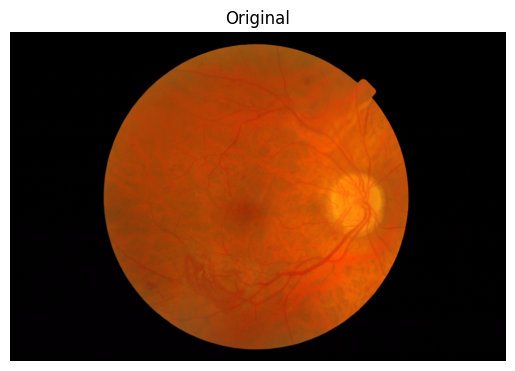

<class 'numpy.ndarray'> (1488, 2240, 3)


In [11]:
#img_nparray = plt.imread('20051020_43808_0100_PP.tif')
img_nparray = np.asarray(img)
show_image(img_nparray, title='Original')

## Operations

### Flipping Images

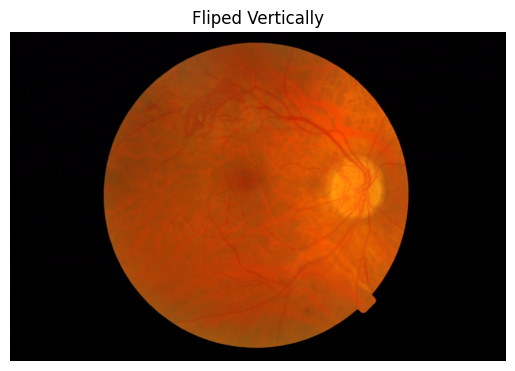

<class 'numpy.ndarray'> (1488, 2240, 3)


In [12]:
img_flipud = np.flipud(img_nparray)
img_fliplr = np.fliplr(img_nparray)
show_image(img_flipud, title='Fliped Vertically') # fliplr to flip horizontally

### Convert to Gray Scale

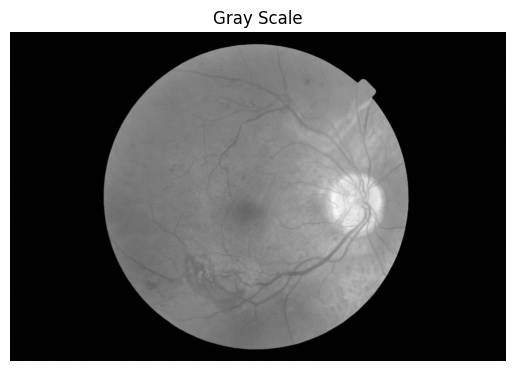

<class 'numpy.ndarray'> (1488, 2240)


In [13]:
img_gray = color.rgb2gray(img_nparray)
show_image(img_gray, title='Gray Scale')

### RGB Channels (Histograms)

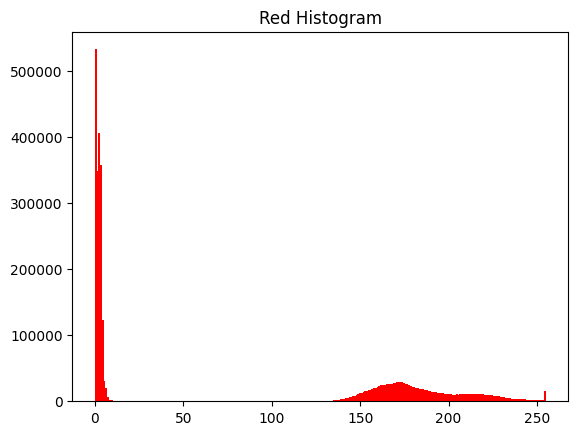

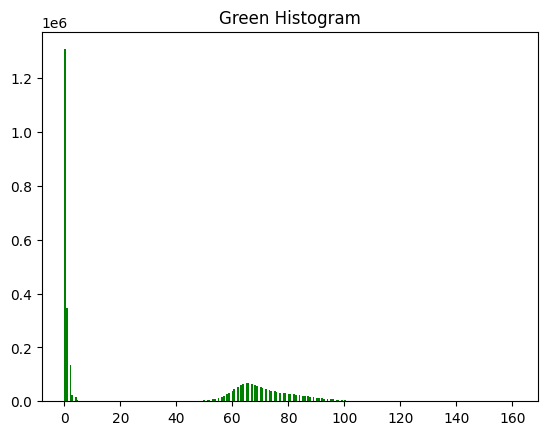

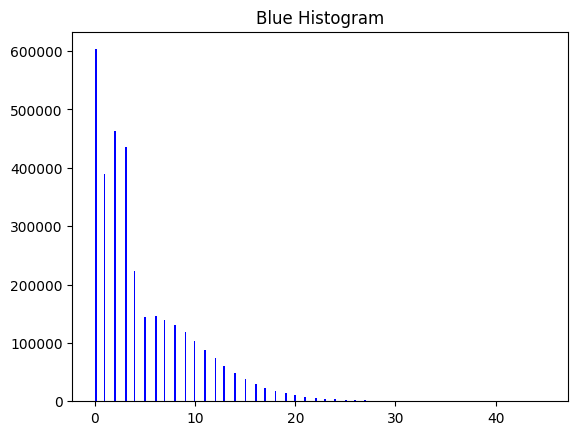

In [14]:
# Getting the RGB channels from the image
red_channel = img_nparray[:, :, 0] # Obtain the red channel
green_channel = img_nparray[:, :, 1] # Obtain the green channel
blue_channel = img_nparray[:, :, 2] # Obtain the blue channel

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256, color='red')
# Set title and show
plt.title('Red Histogram')
plt.show()

# Plot the green histogram with bins in a range of 256
plt.hist(green_channel.ravel(), bins=256, color='green')
plt.title('Green Histogram')
plt.show()

# Plot the blue histogram with bins in a range of 256
plt.hist(blue_channel.ravel(), bins=256, color='blue')
plt.title('Blue Histogram')
plt.show()

## Thresholding

### Binary Image

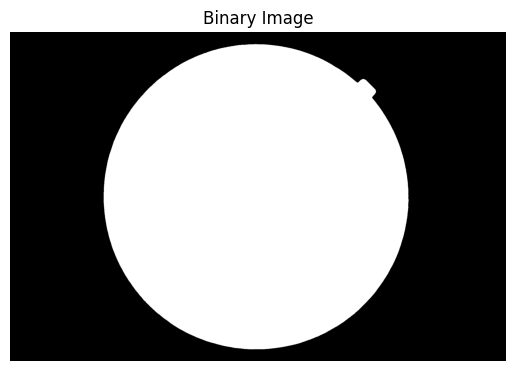

<class 'numpy.ndarray'> (1488, 2240)


In [15]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(img_gray)
# Apply thresholding to the image
binary = img_gray > thresh
# Show the image
show_image(binary, 'Binary Image')

### Global Thresholding

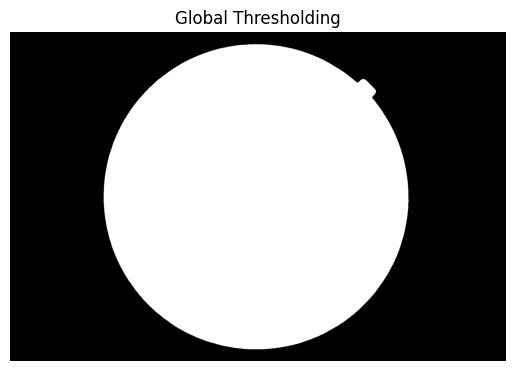

<class 'numpy.ndarray'> (1488, 2240)


In [16]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(img_gray)
# Obtain the binary image by applying global thresholding
binary_global = img_gray > global_thresh
# Show the binary image obtained
show_image(binary_global, 'Global Thresholding')

### Local Thresholding

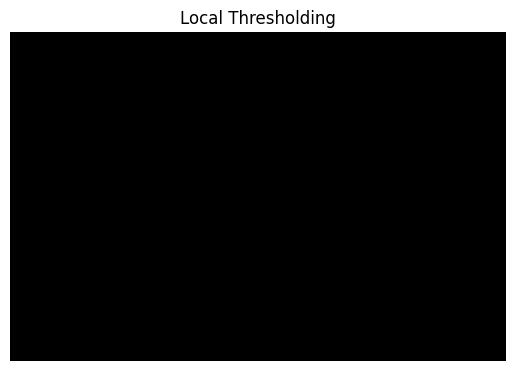

<class 'numpy.ndarray'> (1488, 2240)


In [17]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Set the block size to 35
block_size = 35
# Obtain the optimal local thresholding
local_thresh = threshold_local(img_gray, block_size, offset=10)
# Obtain the binary image by applying local thresholding
binary_local = img_gray > local_thresh
# Show the binary image
show_image(binary_local, 'Local Thresholding')

### Trying All Thresholds

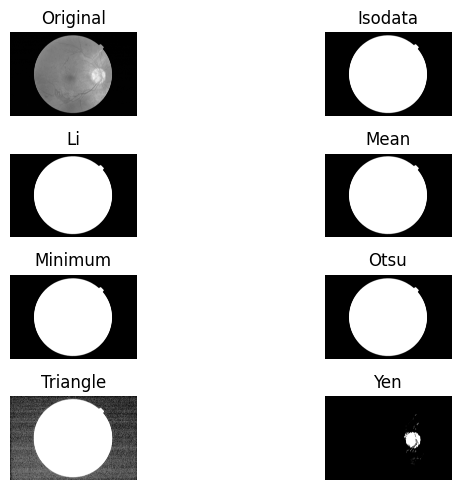

In [18]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(img_gray, verbose=False)
# Show the resulting plots
plt.show()

## Filtering

In [19]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

### Edge Detection

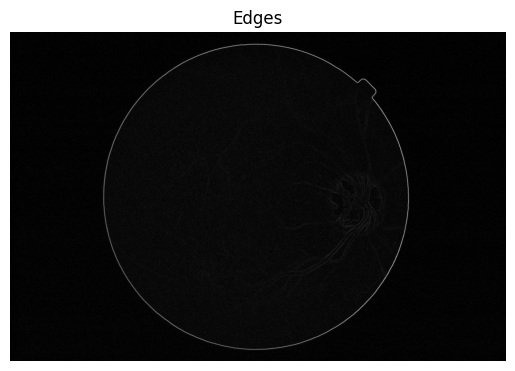

<class 'numpy.ndarray'> (1488, 2240)


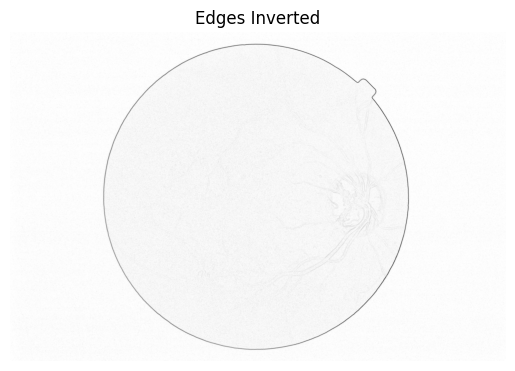

<class 'numpy.ndarray'> (1488, 2240)


In [20]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
img_edges = sobel(img_gray)
# Show the edge image
show_image(img_edges, 'Edges')
# Show the edge image inverted
show_image(img_edges, title='Edges Inverted', cmap_type="gist_yarg")

### Blurring to Reduce Noise

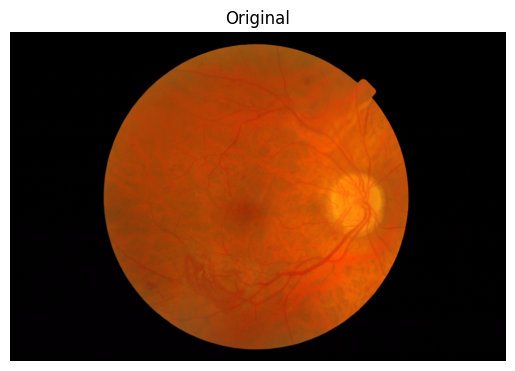

<class 'numpy.ndarray'> (1488, 2240, 3)


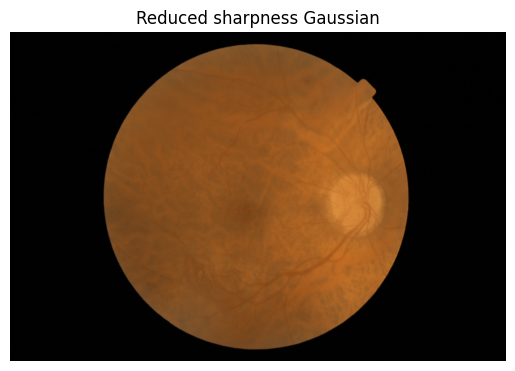

<class 'numpy.ndarray'> (1488, 2240, 3)


In [21]:
gaussian_image = gaussian(img_nparray, channel_axis=True)
show_image(img_nparray, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

### Contrast Enhancement

Measure of its dynamic range or the spread of its histogram. Contrast enhancement can be done by usinf the **contrast stretching techniques** which is used to stretch the histogram so the full range of intensity values is filled. The other technique used is **histogram equalization** that spreads out the most frequent histogram intensities values using probability distribution. There are three types of histogram equalization:

1. **Standard Histogram Equalization:** Increasing overall contrast
2. **Adaptive Histogram Equalization:** This method computes several histograms, each corresponding to a distinct region of the image, and use them to redistribute the lightest values of the image histogram
3. **Contrast Limited Adaptive HE (CLAHE):** This is similar to 2 but it softeness the noise in the image since it is not taking the global histogram but operates in small regions.

#### Standard Histogram Equalization

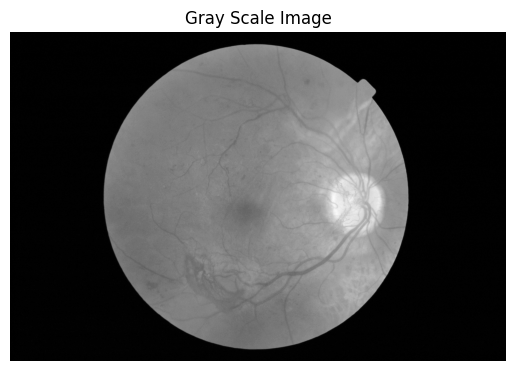

<class 'numpy.ndarray'> (1488, 2240)


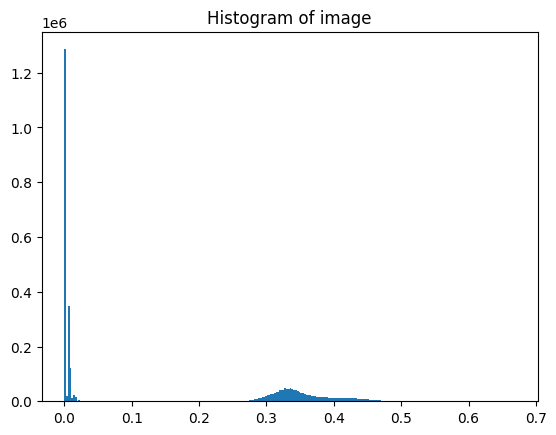

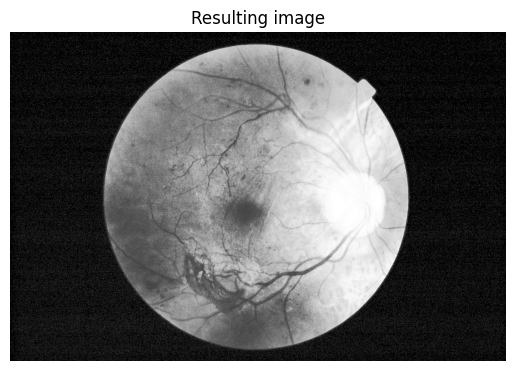

<class 'numpy.ndarray'> (1488, 2240)


In [22]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Show original x-ray image and its histogram
show_image(img_gray, 'Gray Scale Image')

# histogram
plt.title('Histogram of image')
plt.hist(img_gray.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
img_hist_eq = exposure.equalize_hist(img_gray)
# Show the resulting image
show_image(img_hist_eq, 'Resulting image')

#### CLAHE

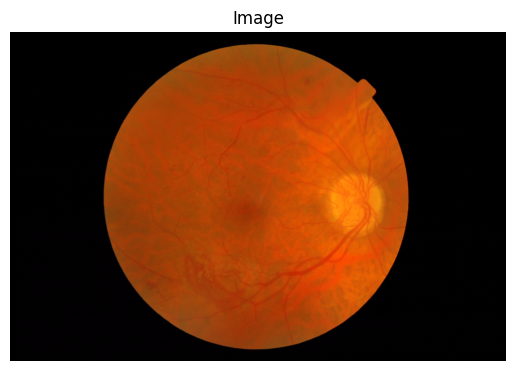

<class 'numpy.ndarray'> (1488, 2240, 3)


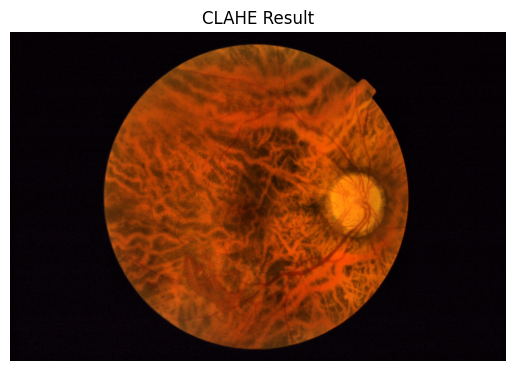

<class 'numpy.ndarray'> (1488, 2240, 3)


In [23]:
# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(img_nparray, clip_limit=0.02)

# Compare the original image to the equalized
show_image(img_nparray)
show_image(adapthist_eq_image, 'CLAHE Result')

### Hysteresis Thresholding

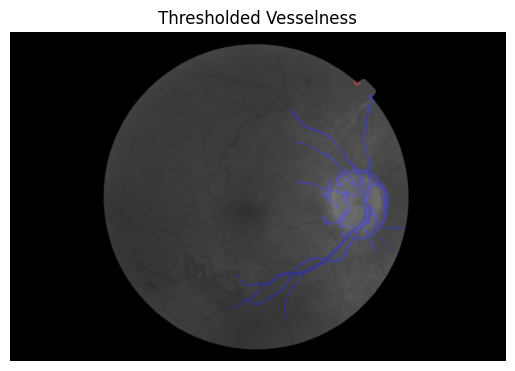

In [24]:
# Hysteresis Thresholding
retina = color.rgb2gray(img_nparray)
t0, t1 = filters.threshold_multiotsu(retina, classes=3)
mask = (retina > t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask

thresholded = filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)
labeled = ndi.label(thresholded)[0]

_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()
_ = ax.set_title('Thresholded Vesselness')

### Applying the Vesselness Filter

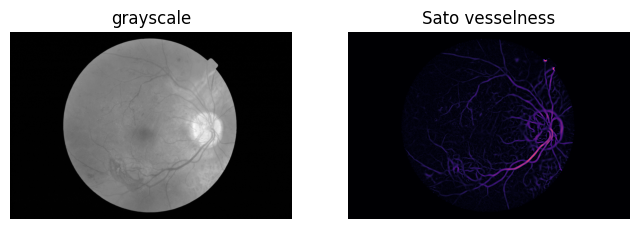

In [25]:
retina = color.rgb2gray(img_nparray)
t0, t1 = filters.threshold_multiotsu(retina, classes=3)
mask = (retina > t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,8))
axes[0].imshow(retina, cmap='gray')
axes[0].set_axis_off()
axes[0].set_title('grayscale')
axes[1].imshow(vessels, cmap='magma')
axes[1].set_axis_off()
_ = axes[1].set_title('Sato vesselness')

### Skelotonize

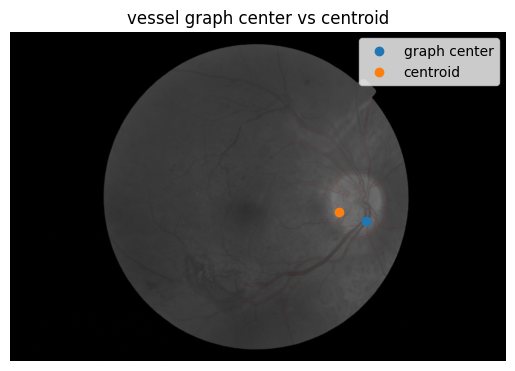

In [26]:
largest_nonzero_label = np.argmax(np.bincount(labeled[labeled > 0]))
binary = labeled == largest_nonzero_label
skeleton = morphology.skeletonize(binary)
g, nodes = graph.pixel_graph(skeleton, connectivity=2)
px, distances = graph.central_pixel(
        g, nodes=nodes, shape=skeleton.shape, partition_size=100
        )

centroid = measure.centroid(labeled > 0)

_, ax = plt.subplots()
ax.imshow(color.label2rgb(skeleton, retina))
ax.scatter(px[1], px[0], label='graph center')
ax.scatter(centroid[1], centroid[0], label='centroid')
ax.legend()
ax.set_axis_off()
ax.set_title('vessel graph center vs centroid')

plt.show()

## Transformations

### Reducing with Antialiasing

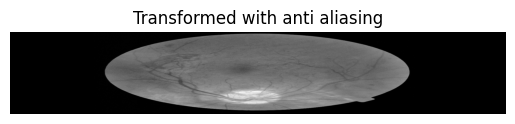

<class 'numpy.ndarray'> (372, 2240, 1)


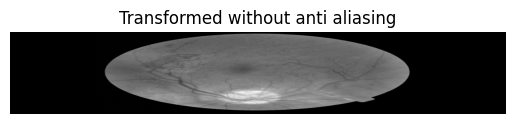

<class 'numpy.ndarray'> (372, 2240, 1)


In [27]:
# Rotate the image 90 degrees clockwise 
rotated_img = rotate(img_nparray, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_img, 1/4, anti_aliasing=True, channel_axis=True)

# Rescale without anti aliasing
rescaled_without_aa = rescaled_with_aa = rescale(rotated_img, 1/4, anti_aliasing=False, channel_axis=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")

### Enlarging Images

In [28]:
# Enlarge the image so it is 3 times bigger
enlarged_img = rescale(img_nparray, 1, anti_aliasing=True, channel_axis=True)

# Show original and resulting image
#show_image(img_nparray)
#show_image(enlarged_img, "3 times enlarged image")

### Proportionally Resizing

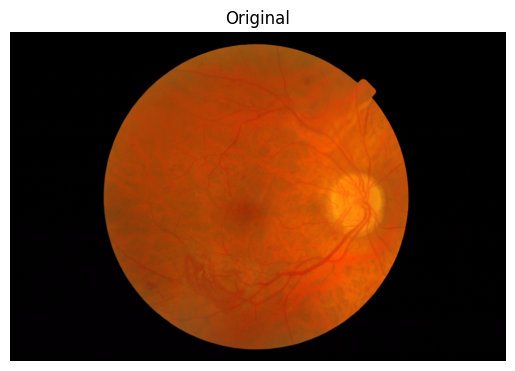

<class 'numpy.ndarray'> (1488, 2240, 3)


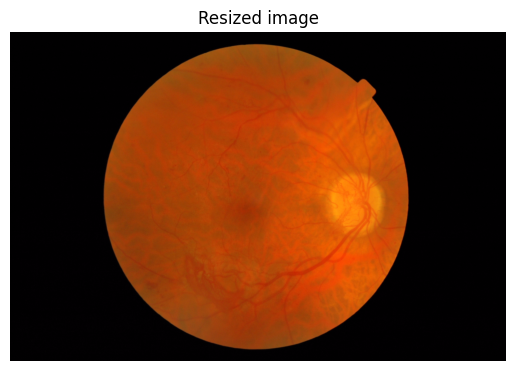

<class 'numpy.ndarray'> (744, 1120, 3)


In [29]:
# Set proportional height so its half its size
height = int(img_nparray.shape[0] / 2)
width = int(img_nparray.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(img_nparray, (height, width),
                       anti_aliasing=True)

# Show the original and resized image
show_image(img_nparray, 'Original')
show_image(image_resized, 'Resized image')

## Morphology

Basic Morphological Operations Include:

1. **Dilation:** Adds pixels to the boundaries of the objects in an image
2. **Erotion:** Removes pixels on object's boundaries

The number of pixels added or removed on an image depends on the size and shape of a structuring element used to process the image (like a kernel).

### Erosion

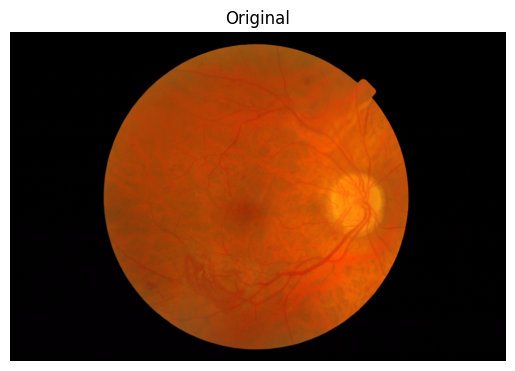

<class 'numpy.ndarray'> (1488, 2240, 3)


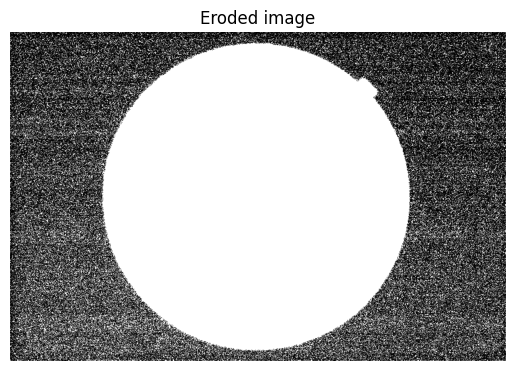

<class 'numpy.ndarray'> (1488, 2240)


In [30]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(img_gray) 

# See results
show_image(img_nparray, 'Original')
show_image(eroded_image_shape, 'Eroded image')

### Dilation

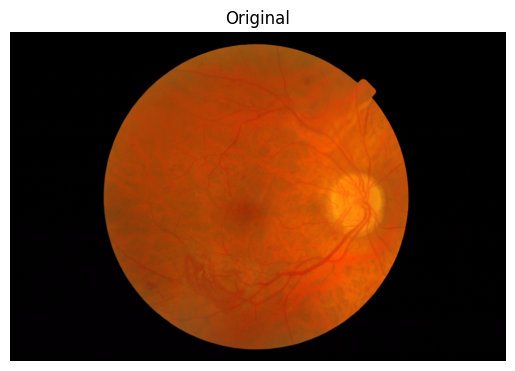

<class 'numpy.ndarray'> (1488, 2240, 3)


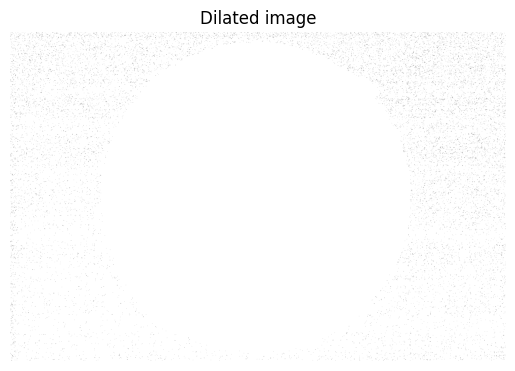

<class 'numpy.ndarray'> (1488, 2240)


In [31]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Obtain the dilated image 
dilated_image = morphology.binary_dilation(img_gray)

# See results
show_image(img_nparray, 'Original')
show_image(dilated_image, 'Dilated image')

## Segmentation

The goal is to change the representation into something more meaningful and easier to analyze by increasing computational efficiency, the segmentation is done by using superpixels. Thresholding is the simplest method for segmentation.

**Superpixel:** group of connected pixels with similar color or gray levels

Segmentation can be done in a supervised or unsupervised way. Supervised being when prior information like threshold values is provided before the segmentation. Unsupervised is when there is no information given, for doing unsupervised we can apply a KNN-like model in the image to get some features from the image.

For this project however, segmentation will be only required for computational purposes since it sould harm the resolution of the vessels in the image (objects of interest).

## Contours

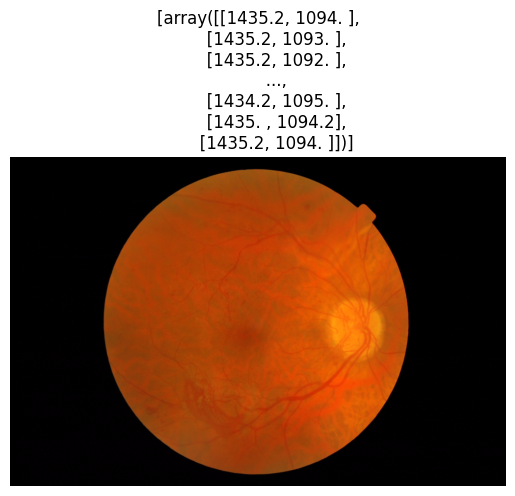

<class 'numpy.ndarray'> (1488, 2240, 3)


In [32]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Obtain the optimal thresh value
thresh = filters.threshold_otsu(img_gray)
# Apply thresholding
binary = img_gray > thresh
# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)
# Show the image
show_image(img_nparray, contours)

## Detecting Edges

The Canny edge detection is the standar edge detection technique in image processing that produces high accuracy in detection edges and less execution time. The goal is to detecte edges in the image and highlight them with thicker lines for spotting them more accurately. 

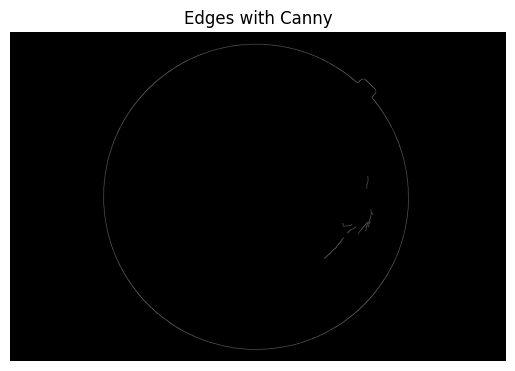

<class 'numpy.ndarray'> (1488, 2240)


In [33]:
# Convert image to grayscale
img_gray = color.rgb2gray(img_nparray)
# Apply canny edge detector
canny_edges = canny(img_gray)
# Show resulting image
show_image(canny_edges, "Edges with Canny")

### Less or More Edgy

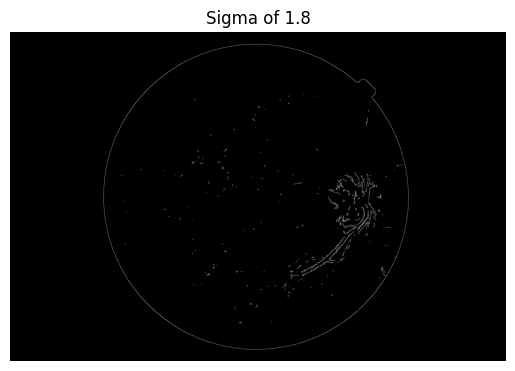

<class 'numpy.ndarray'> (1488, 2240)


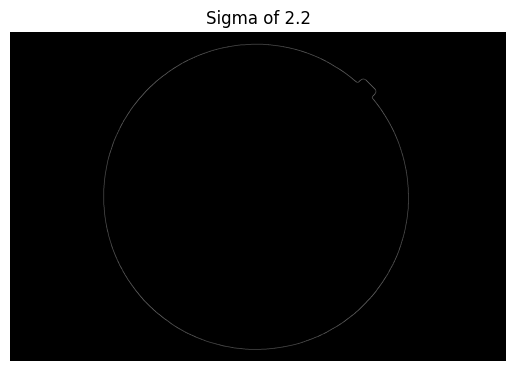

<class 'numpy.ndarray'> (1488, 2240)


In [34]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(img_gray, sigma=0.002)
# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(img_gray, sigma=2.2)
# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")

### Summary of Operations / Transformations / Morphology

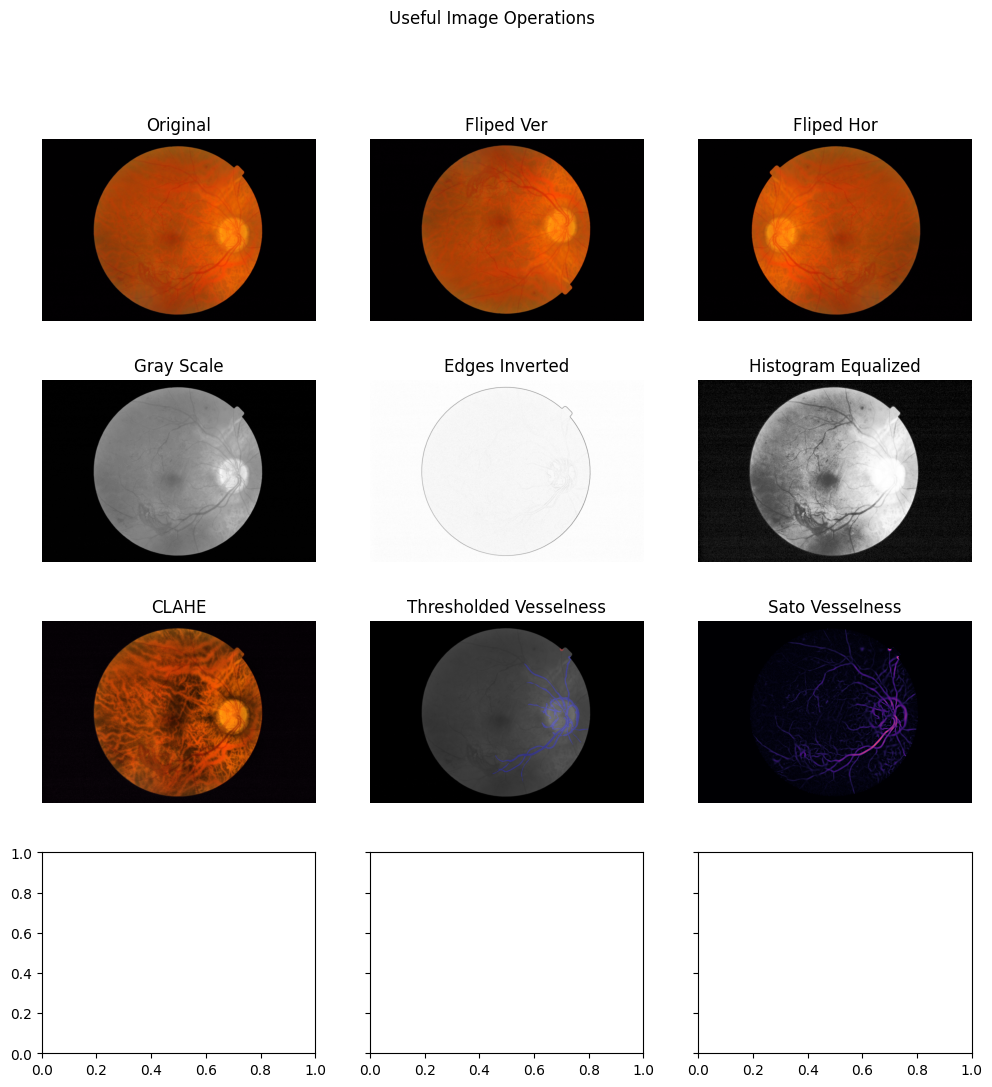

In [35]:
# setting different parameters to adjust each grid
fig, axs = plt.subplots(4, 3, figsize=(12,12))
#fig.tight_layout()
fig.suptitle('Useful Image Operations')

axs[0,0].imshow(img_nparray, cmap='gray')
axs[0,0].set_axis_off()
axs[0,0].set_title('Original')

axs[0,1].imshow(img_flipud, cmap='gray')
axs[0,1].set_axis_off()
axs[0,1].set_title('Fliped Ver')

axs[0,2].imshow(img_fliplr, cmap='gray')
axs[0,2].set_axis_off()
axs[0,2].set_title('Fliped Hor')

axs[1,0].imshow(img_gray, cmap='gray')
axs[1,0].set_axis_off()
axs[1,0].set_title('Gray Scale')

axs[1,1].imshow(img_edges, cmap="gist_yarg")
axs[1,1].set_axis_off()
axs[1,1].set_title('Edges Inverted')

axs[1,2].imshow(img_hist_eq, cmap='gray')
axs[1,2].set_axis_off()
axs[1,2].set_title('Histogram Equalized')

axs[2,0].imshow(adapthist_eq_image)
axs[2,0].set_axis_off()
axs[2,0].set_title('CLAHE')

axs[2,1].imshow(color.label2rgb(labeled, retina))
axs[2,1].set_axis_off()
axs[2,1].set_title('Thresholded Vesselness')

axs[2,2].imshow(vessels, cmap='magma')
axs[2,2].set_axis_off()
axs[2,2].set_title('Sato Vesselness')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()